In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Загрузка данных

In [2]:
data = pd.read_csv('./metal_bands_2017.csv',encoding='latin-1')

### Предобработка

In [3]:
data.head(2)

,Unnamed: 0,band_name,fans,formed,origin,split,style
0,0,Iron Maiden,4195,1975,United Kingdom,-,"New wave of british heavy,Heavy"
1,1,Opeth,4147,1990,Sweden,1990,"Extreme progressive,Progressive rock,Progressive"


In [4]:
dataset = data.iloc[:, 1:7]
dataset.head(2)

,band_name,fans,formed,origin,split,style
0,Iron Maiden,4195,1975,United Kingdom,-,"New wave of british heavy,Heavy"
1,Opeth,4147,1990,Sweden,1990,"Extreme progressive,Progressive rock,Progressive"


In [5]:
dataset.shape

(5000, 6)

In [6]:
dataset = dataset.drop_duplicates(keep='first')
dataset.shape

(4950, 6)

In [7]:
dataset["origin"].isnull().sum()

8

In [8]:
dataset["origin"].fillna("undefined", inplace=True)

In [9]:
dataset["origin"].isnull().sum()

0

In [10]:
dataset.head()

,band_name,fans,formed,origin,split,style
0,Iron Maiden,4195,1975,United Kingdom,-,"New wave of british heavy,Heavy"
1,Opeth,4147,1990,Sweden,1990,"Extreme progressive,Progressive rock,Progressive"
2,Metallica,3712,1981,USA,-,"Heavy,Bay area thrash"
3,Megadeth,3105,1983,USA,1983,"Thrash,Heavy,Hard rock"
4,Amon Amarth,3054,1988,Sweden,-,Melodic death


# Проверка гипотезы "Популярность металл групп уменьшается"

In [11]:
split_count = dataset["split"].value_counts(ascending=False)
formed_count = dataset["formed"].value_counts(ascending=False)

In [12]:
formed_count.head()

2005    270
2007    265
2006    248
2008    227
2004    220
Name: formed, dtype: int64

In [13]:
data_ = {'split': split_count, 'formed': formed_count}
split_formed = pd.DataFrame(data=data_)

split_formed.head(10)

,split,formed
-,2193.0,4
1964,NaN,1
1965,1.0,1
1967,2.0,3
1968,4.0,6
1969,4.0,5
1970,NaN,1
1971,NaN,1
1972,3.0,5
1973,2.0,4


## Динамика популярности металла с точки зрения исполнителей

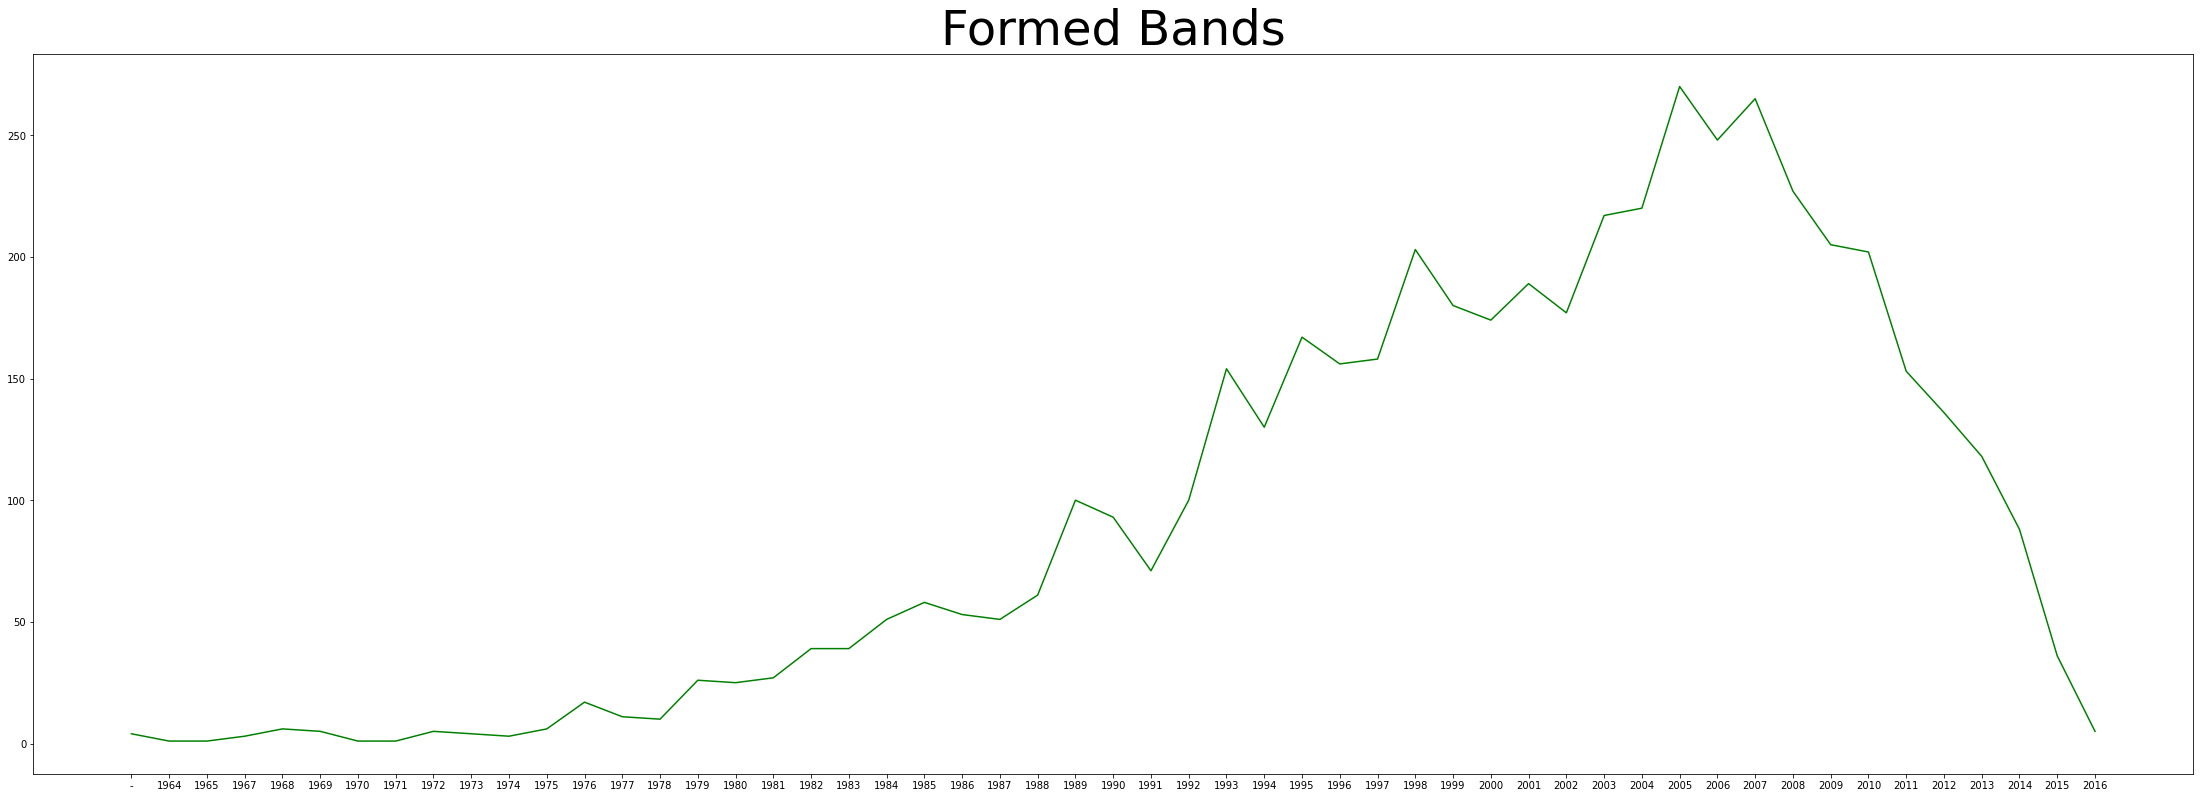

In [14]:
fig = plt.figure(figsize=(30,10))
ax1 = fig.add_axes([0, 0, 1, 1])
ax1.set_title("Formed Bands", fontsize=48)

ax1.plot(split_formed["formed"], color='green')


(0.0, 250.0)

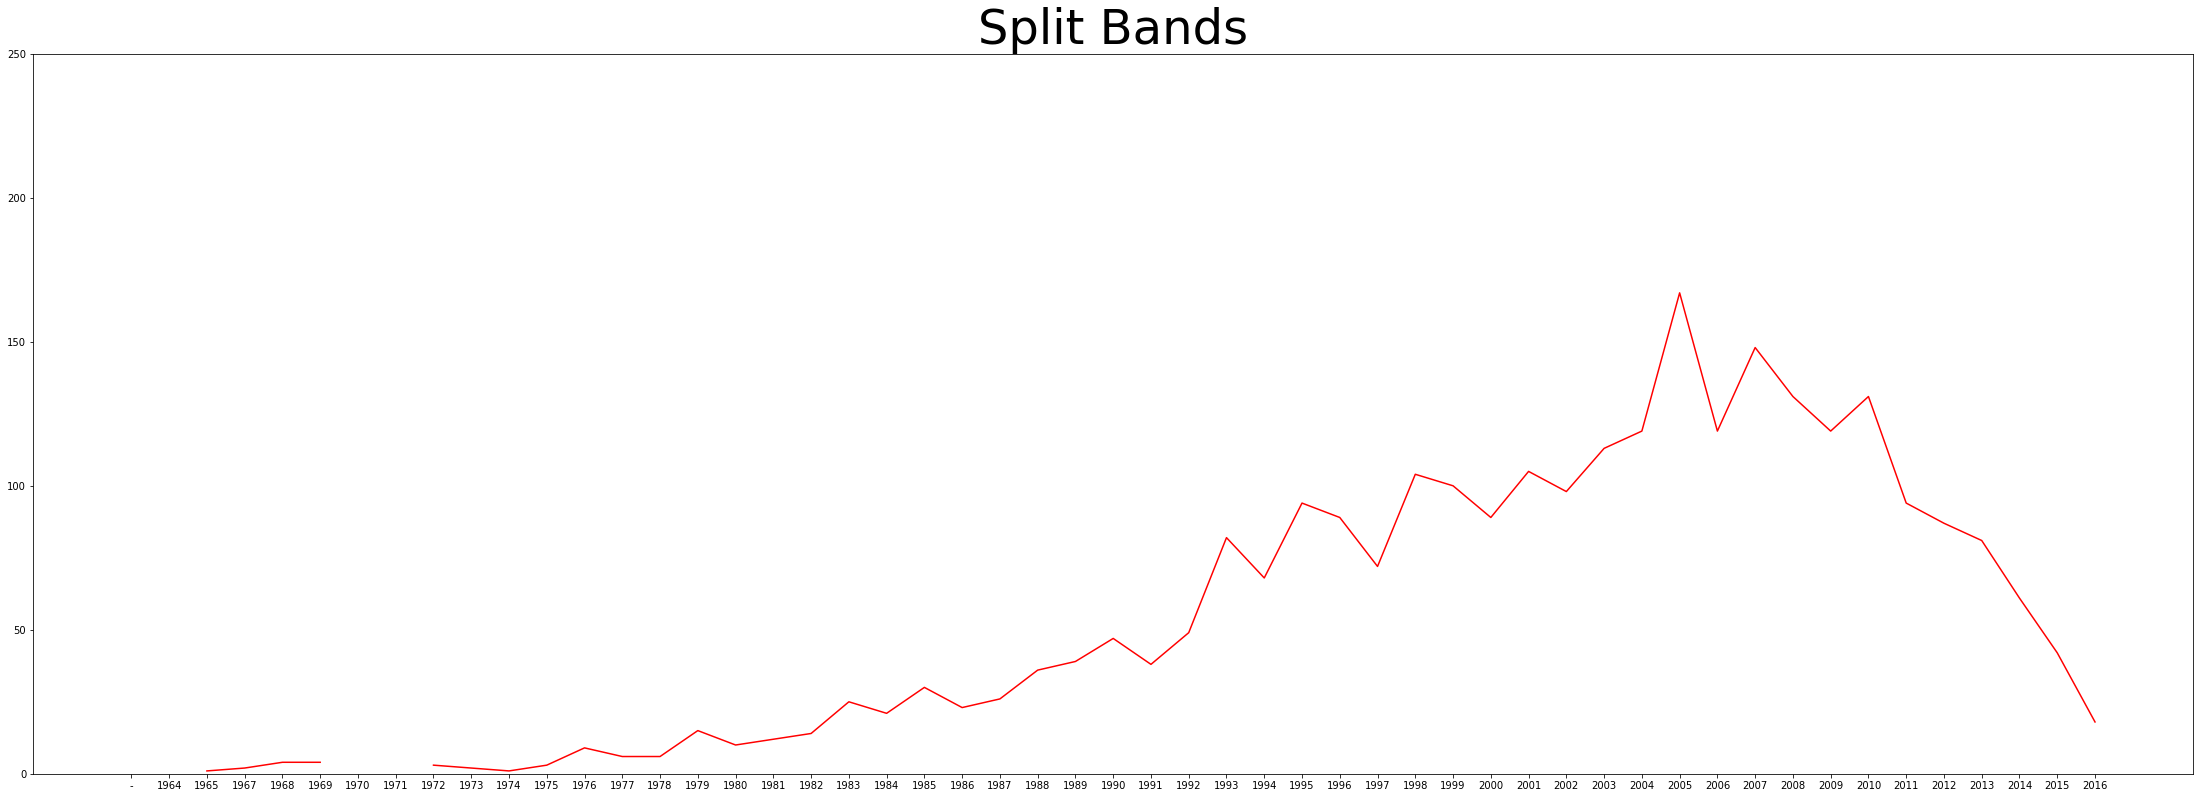

In [15]:
fig = plt.figure(figsize=(30,10))
ax2 = fig.add_axes([0, 0, 1, 1])
ax2.plot(split_formed["split"], color='red')
ax2.set_title("Split Bands", fontsize=48)

plt.ylim([0, 250])


In [16]:
# график зависимости количества существующих банд от времени
metal_counts = {"x": [], "y": []}
for i in range(1964, 2016):
    metal_counts["x"].append(i)
    
    groups = 0
    for index, line in dataset.iterrows():
        if (line["formed"] == '-'):
            continue
            
        formed_earlier = int(line["formed"]) <= i
        
        if (line["split"] == '-' and formed_earlier):
            groups += 1
            continue
            
        if (formed_earlier and int(line["split"]) >= i):
            groups += 1
            
    metal_counts["y"].append(groups)
    
            

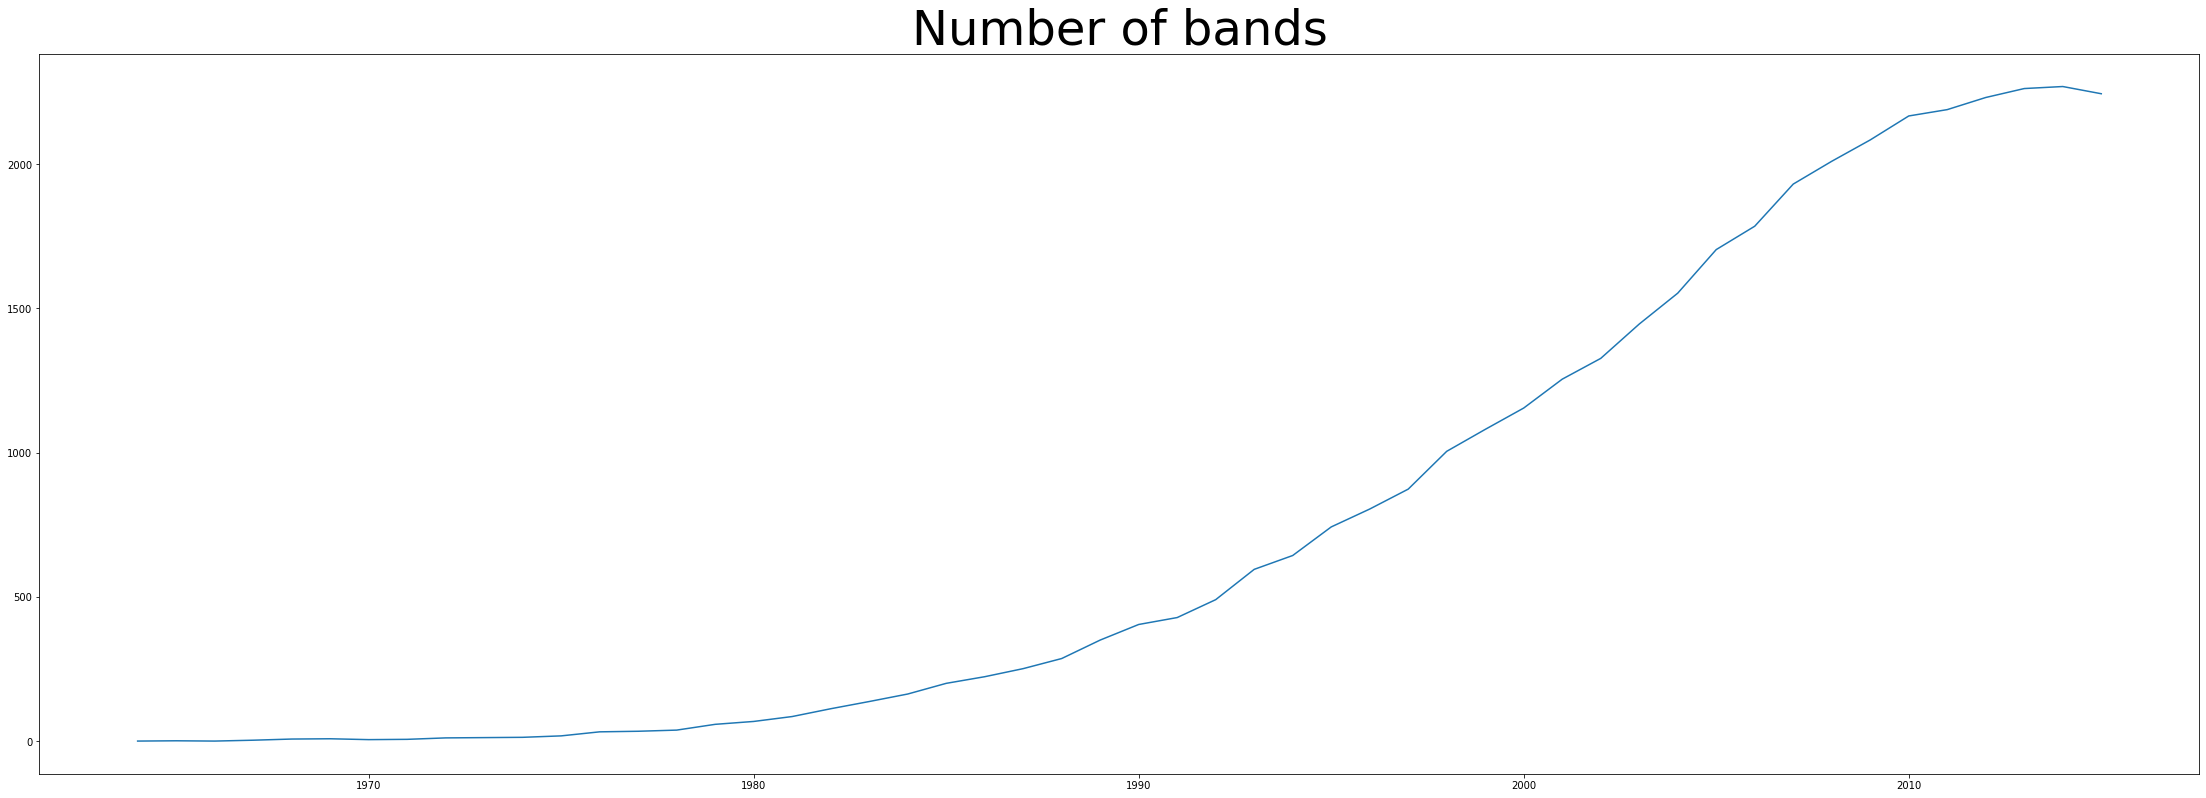

In [17]:
np.array([[1,2],[3,4]])
fig = plt.figure(figsize=(30,10))
ax3 = fig.add_axes([0, 0, 1, 1])
ax3.set_title("Number of bands", fontsize=48)
ax3.plot(metal_counts["x"], metal_counts["y"])


### Выводы из графиков
Как видно из графиков выше - после 2006 года началось резкое падение темпов как формирования новых групп, так и расформирования старых. То есть формируется определенный костяк "закрепившихся" групп (новые группы не создаются, а старые - не расходятся), что свидетельсвует о снижении интереса исполнителей к данному музыкальному направлению. 
Об этом также говорит график количества банд.

##  Динамика популярности направления с точки зрения фанатов

In [18]:
# график зависимости количества фанатов всех металл групп от времени
fan_counts = {"x": [], "y": []}
for i in range(1964, 2015):
    fan_counts["x"].append(i)
    
    fans = 0
    for index, line in dataset.iterrows():
        if (line["formed"] == '-'):
            continue
            
        formed_earlier = int(line["formed"]) <= i
        
        if (line["split"] == '-' and formed_earlier):
            fans += int(line["fans"])
            continue
            
        if (formed_earlier and int(line["split"]) >= i):
            groups += int(line["fans"])
            
    fan_counts["y"].append(groups)

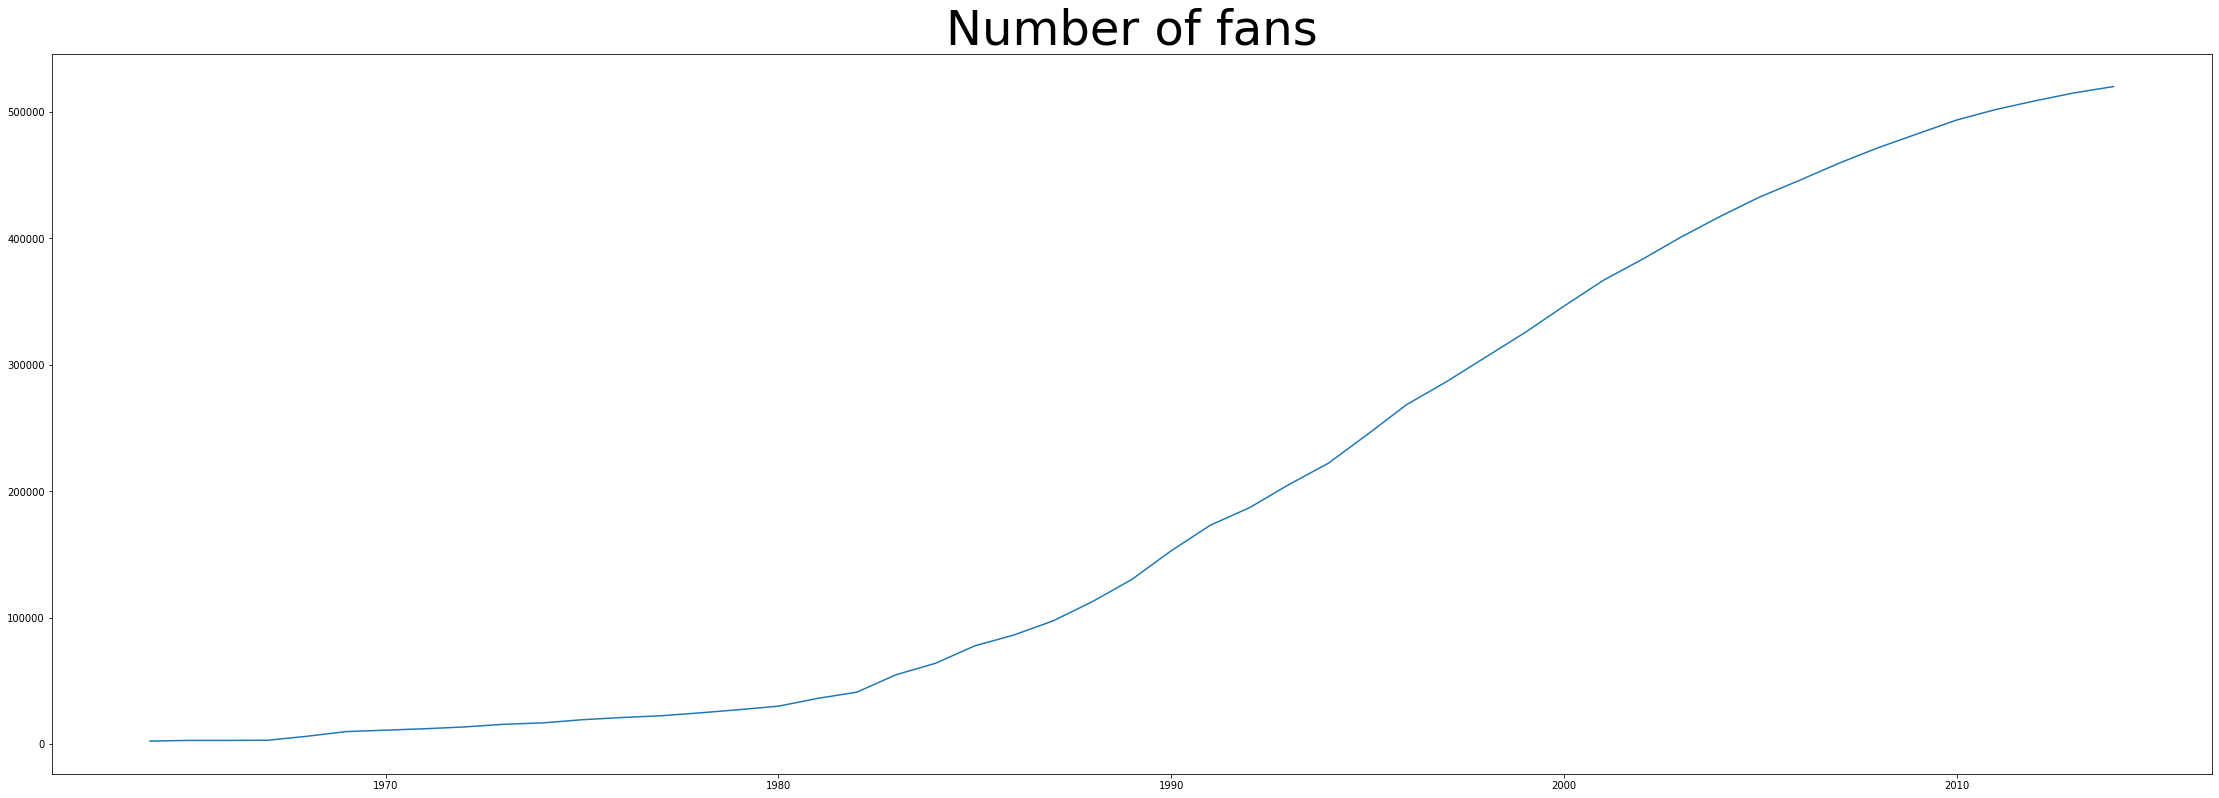

In [19]:
np.array([[1,2],[3,4]])
fig = plt.figure(figsize=(30,10))
ax3 = fig.add_axes([0, 0, 1, 1])
ax3.set_title("Number of fans", fontsize=48)
ax3.plot(fan_counts["x"], fan_counts["y"])


#### Количество фанатов растет, но необходимо сделать поправку на мировой рост населения

In [20]:
pop = pd.read_csv('./world_population_1960_2015.csv',encoding='latin-1')
pop.head()

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Aruba,54208.0,55435.0,56226.0,56697.0,57029.0,57360.0,57712.0,58049.0,58385.0,...,100830.0,101218.0,101342.0,101416.0,101597.0,101936.0,102393.0,102921.0,103441.0,103889.0
1,Andorra,13414.0,14376.0,15376.0,16410.0,17470.0,18551.0,19646.0,20755.0,21888.0,...,83373.0,84878.0,85616.0,85474.0,84419.0,82326.0,79316.0,75902.0,72786.0,70473.0
2,Afghanistan,8994793.0,9164945.0,9343772.0,9531555.0,9728645.0,9935358.0,10148841.0,10368600.0,10599790.0,...,25183615.0,25877544.0,26528741.0,27207291.0,27962207.0,28809167.0,29726803.0,30682500.0,31627506.0,32526562.0
3,Angola,5270844.0,5367287.0,5465905.0,5565808.0,5665701.0,5765025.0,5863568.0,5962831.0,6066094.0,...,18541467.0,19183907.0,19842251.0,20520103.0,21219954.0,21942296.0,22685632.0,23448202.0,24227524.0,25021974.0
4,Albania,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,2022272.0,...,2992547.0,2970017.0,2947314.0,2927519.0,2913021.0,2904780.0,2900247.0,2896652.0,2893654.0,2889167.0


In [21]:
year = 1964
new_fan_counts = []
for fan_count in fan_counts["y"]:
    fan_persentage = fan_count/pop[str(year)].sum()*100
    year += 1
    new_fan_counts.append(fan_persentage)
    
fan_counts["y"] = new_fan_counts


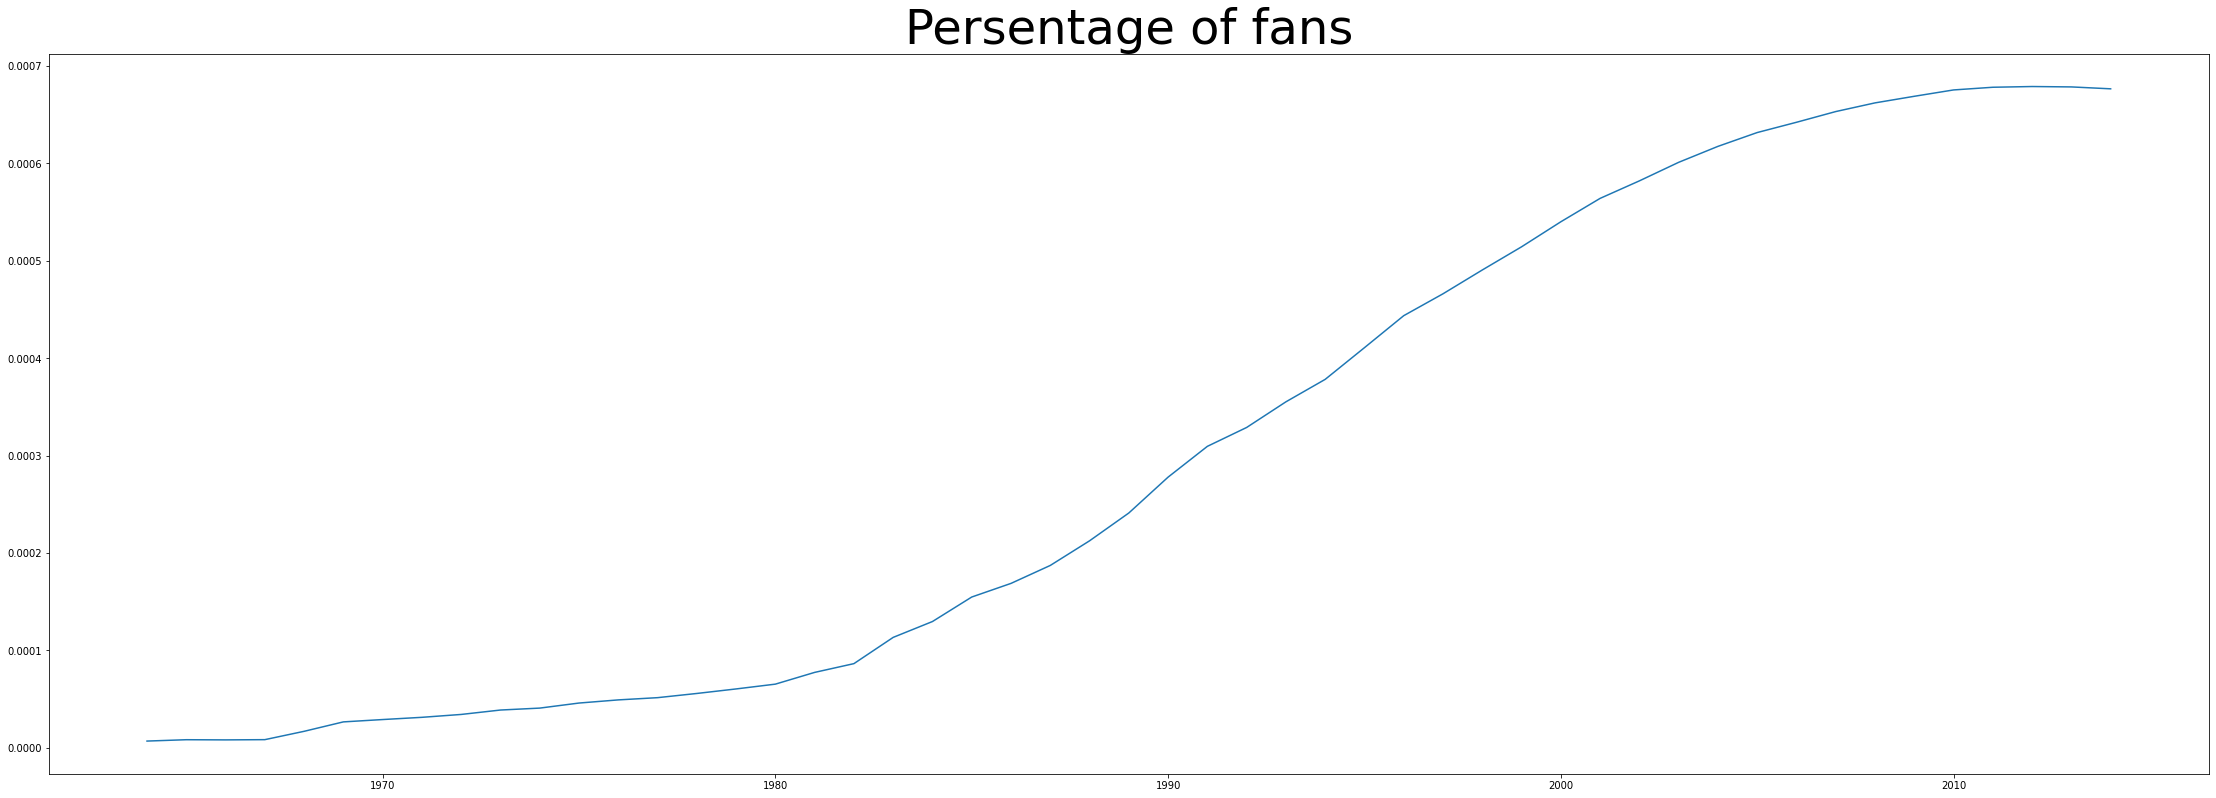

In [22]:
np.array([[1,2],[3,4]])
fig = plt.figure(figsize=(30,10))
ax4 = fig.add_axes([0, 0, 1, 1])
ax4.set_title("Persentage of fans", fontsize=48)
ax4.plot(fan_counts["x"], fan_counts["y"])


### Вывод
Количество фанатов металла стабильно расло до 2010, после чего примерно выровнялось с темпом роста населения, что свидетельствует о снижении общего интереса населения к данному музыкальному жанру

# Проверка гипотезы "Существует ли зависимость между популярностью группы и продолжительностью существования коллектива"

#### Для проверки данной гипотезы построим 2 предиктивные модели и 1 модель кластеризации:
- дерево решений
- логистическая регрессия
- кластеризация методом k-means

#### После чего выполним сравнение первых двух на тестовой выборке, проанализируем результаты, сделаем выводы

In [23]:
dataset.head()

,band_name,fans,formed,origin,split,style
0,Iron Maiden,4195,1975,United Kingdom,-,"New wave of british heavy,Heavy"
1,Opeth,4147,1990,Sweden,1990,"Extreme progressive,Progressive rock,Progressive"
2,Metallica,3712,1981,USA,-,"Heavy,Bay area thrash"
3,Megadeth,3105,1983,USA,1983,"Thrash,Heavy,Hard rock"
4,Amon Amarth,3054,1988,Sweden,-,Melodic death


#### Отфильтруем невалидные значения formed и split ('-')

In [24]:
clear_df = dataset[dataset["split"] != '-']

In [25]:
clear_df = clear_df[clear_df["formed"] != '-']

In [26]:
clear_df.head()

,band_name,fans,formed,origin,split,style
1,Opeth,4147,1990,Sweden,1990,"Extreme progressive,Progressive rock,Progressive"
3,Megadeth,3105,1983,USA,1983,"Thrash,Heavy,Hard rock"
5,Slayer,2955,1981,USA,1981,Thrash
6,Death,2690,1983,USA,2001,"Progressive death,Death,Progressive thrash"
7,Dream Theater,2329,1985,USA,1985,Progressive


#### Добавим столбец duration (продолжительность существования)

In [27]:
durations = []
length = len(clear_df["split"])

for index, row in clear_df.iterrows():
    duration = int(row["split"]) - int(row["formed"])
    durations.append(duration)
    
clear_df["duration"] = durations

clear_df.head()

,band_name,fans,formed,origin,split,style,duration
1,Opeth,4147,1990,Sweden,1990,"Extreme progressive,Progressive rock,Progressive",0
3,Megadeth,3105,1983,USA,1983,"Thrash,Heavy,Hard rock",0
5,Slayer,2955,1981,USA,1981,Thrash,0
6,Death,2690,1983,USA,2001,"Progressive death,Death,Progressive thrash",18
7,Dream Theater,2329,1985,USA,1985,Progressive,0


#### Разделим датасет на тренировочный и проверочный

In [28]:
duration_counts = clear_df["duration"].value_counts()

Text(0.5, 1.0, 'Распределение групп по длительности существовани')

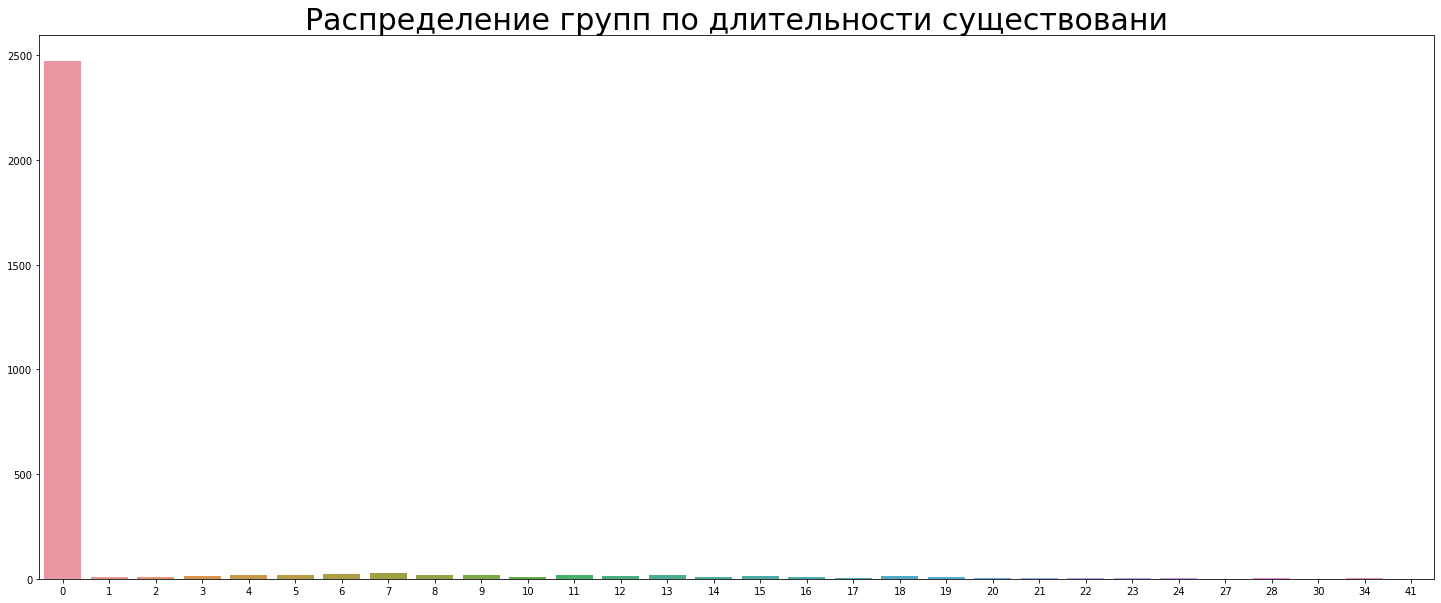

In [55]:
plt.subplots(figsize=(25,10))
sns.barplot(x=duration_counts.keys(), y=duration_counts.values).set_title("Распределение групп по длительности существовани", fontsize=30)

Text(0.5, 1.0, 'Распределение групп по длительности существования')

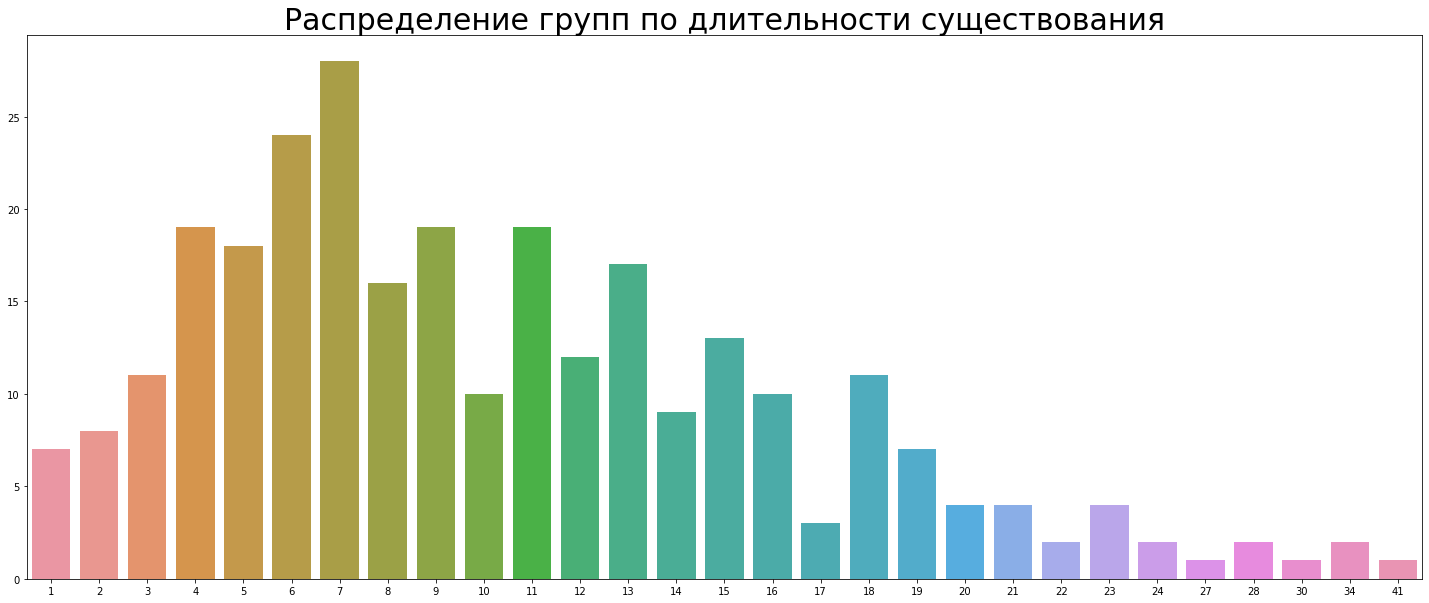

In [54]:
plt.subplots(figsize=(25,10))
sns.barplot(x=duration_counts[1:].keys(), y=duration_counts[1:].values).set_title("Распределение групп по длительности существования", fontsize=30)

#### Как видно из графиков - все группы четко делятся на 2 типа: существующие больше 1 года и меньше 1 года, при чем вторая группа в десять раз больше, чем вторая

Перед началом обучения моделей классификации - добавим target-столбик в датасет is_long_liver

In [31]:
long_liver_arr = []
length = len(clear_df["split"])

for index, row in clear_df.iterrows():
    if (row["duration"] == 0):
        long_liver_arr.append(0)
    else:
        long_liver_arr.append(1)
    
clear_df["is_long_liver"] = long_liver_arr

clear_df.head()

,band_name,fans,formed,origin,split,style,duration,is_long_liver
1,Opeth,4147,1990,Sweden,1990,"Extreme progressive,Progressive rock,Progressive",0,0
3,Megadeth,3105,1983,USA,1983,"Thrash,Heavy,Hard rock",0,0
5,Slayer,2955,1981,USA,1981,Thrash,0,0
6,Death,2690,1983,USA,2001,"Progressive death,Death,Progressive thrash",18,1
7,Dream Theater,2329,1985,USA,1985,Progressive,0,0


In [32]:
clear_df[clear_df['is_long_liver'] == 0].shape

(2473, 8)

In [33]:
clear_df[clear_df['is_long_liver'] == 1].shape

(284, 8)

Text(0.5, 1.0, 'Распределение групп по кол-ву фанатов')

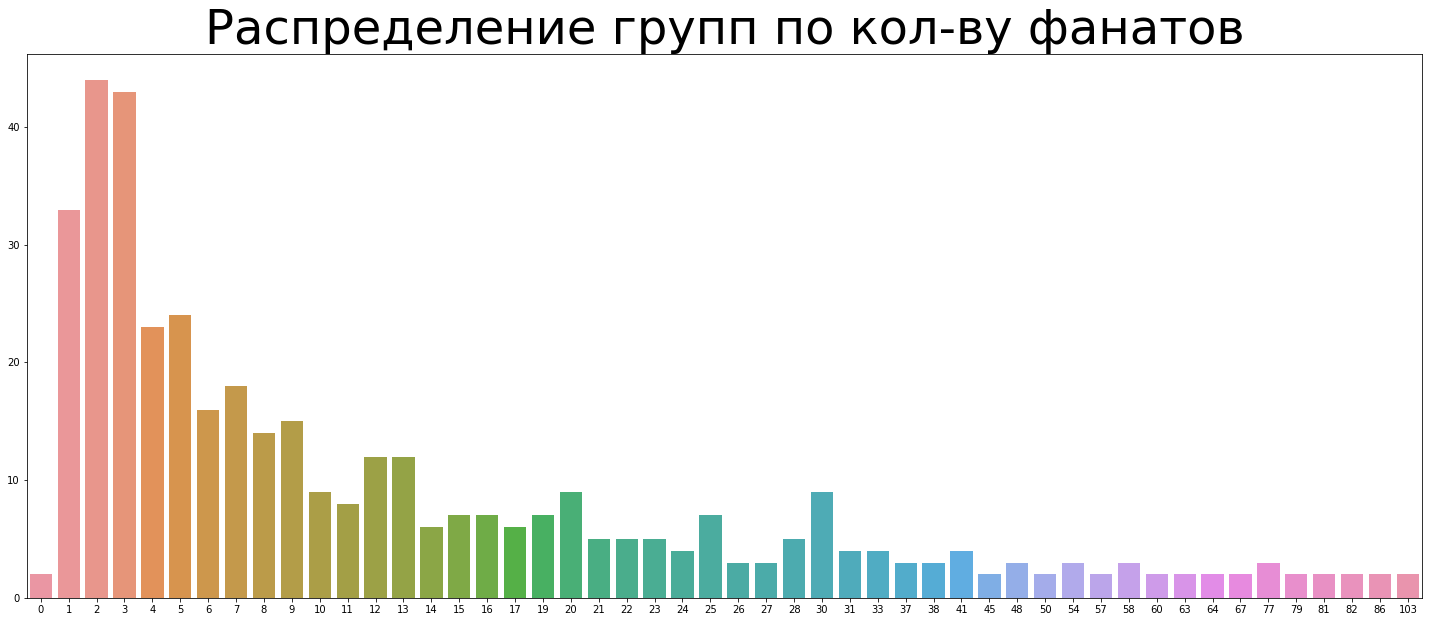

In [53]:
fans = clear_df["fans"].value_counts()
plt.subplots(figsize=(25,10))
sns.barplot(x=fans[:50].keys(), y=fans[:50].values).set_title("Распределение групп по кол-ву фанатов", fontsize=48)

### Отфильтруем 90% всех групп, которые просуществовали менее года, чтобы сбалансировать процесс обучения

In [41]:
import random
for index, row in clear_df.iterrows():
    if (row["is_long_liver"] == 0 and random.random() > 0.1):
        clear_df = clear_df.drop(index, axis=0)

clear_df.shape



(512, 8)

### Обновленное распределение

Text(0.5, 1.0, 'is_long_liver')

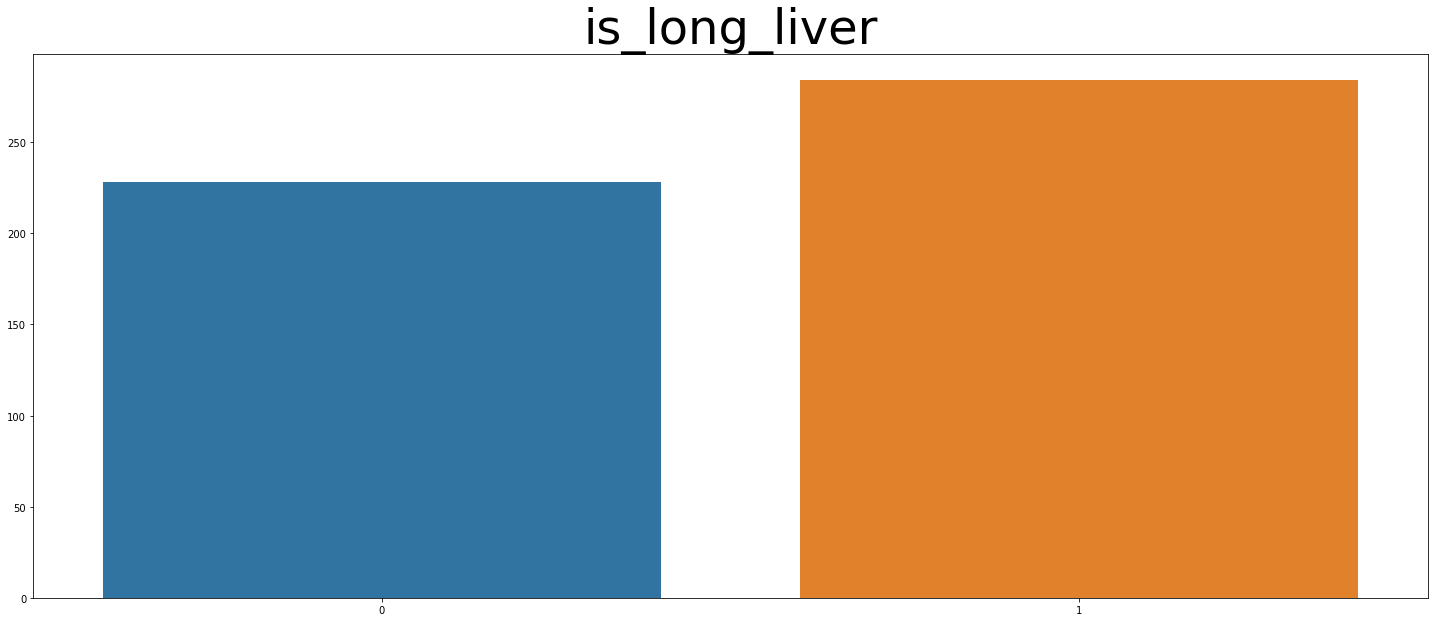

In [51]:
long_liver_counts = clear_df["is_long_liver"].value_counts()
plt.subplots(figsize=(25,10))
sns.barplot(x=long_liver_counts.keys(), y=long_liver_counts.values).set_title("is_long_liver", fontsize=48)

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
train_df, test_df = train_test_split(clear_df, test_size=0.2)
train_df.head(3)



,band_name,fans,formed,origin,split,style,duration,is_long_liver
1593,Folkstone,28,2004,Italy,2004,Folk,0,0
2134,Armagedda,16,2000,Sweden,2004,Black,4,1
1160,Ephel Duath,48,1998,Italy,2014,"Progressive black,Avantgarde",16,1


In [44]:
# X = train_df.drop(['band_name', 'style', 'origin', 'duration', 'is_long_liver', "split", "formed"], axis=1)
X = np.array(train_df["fans"])
X = X.reshape(-1,1)
y = train_df["is_long_liver"]


### Проверим возможность предсказать продержится ли группа больше 1 года, основываясь лишь на знании о количестве фанатов

### Дерево решений

In [46]:
from sklearn import tree
import graphviz 

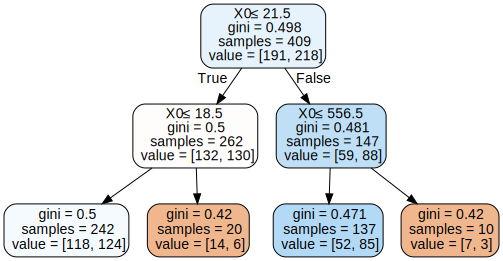

In [60]:
clf = tree.DecisionTreeClassifier(max_depth=2)
clf = clf.fit(X, y)

dot_data = tree.export_graphviz(clf, out_file=None, filled=True, rounded=True, special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [64]:
X_test = np.array(test_df["fans"])
X_test = X_test.reshape(-1,1)
y_test = test_df["is_long_liver"]

print("Точность дерева")
clf.score(X_test,y_test)

Точность дерева


0.6213592233009708

### Логистическая регрессия

In [66]:
from sklearn.linear_model import LogisticRegression


In [67]:
clf = LogisticRegression(random_state=0).fit(X, y)

In [72]:
print("Точность логистической регресии")
clf.score(X_test, y_test)

Точность логистической регресии


0.6310679611650486

### К-ближайших соседей

In [73]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X, y)

KNeighborsClassifier()

In [75]:
print("Точность K-ближайших соседей")
clf.score(X_test, y_test)

0.5145631067961165

### Метод опорных векторов

In [77]:
from sklearn.svm import SVC

clf = SVC(kernel='linear')
clf.fit(X, y)

SVC(kernel='linear')

In [78]:
clf.score(X_test, y_test)

0.6407766990291263

## Выводы:
Каждый из рассмотренных методов показал низкую точность (до 64%), что говорит об отсутствии явной зависимости между количеством фанатов группы и ее вероятностью просуществовать больше 1 года.